In [164]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [165]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [166]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [167]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [168]:
import matplotlib.pyplot as plt


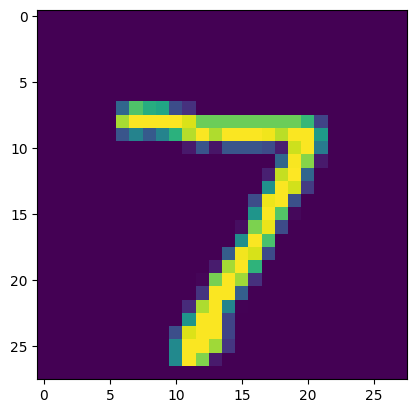

In [169]:
plt.imshow(x_test[0])

In [170]:
x_train = x_train/255
x_test = x_test/255

In [171]:
model = Sequential([
    (Flatten(input_shape=(28,28))),
    (Dense(128,activation='relu')),
    (Dense(32,activation='relu')),
    (Dense(10,activation='softmax'))
])



/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [172]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_8 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In [173]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [174]:
history = model.fit(x_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8559 - loss: 0.5078 - val_accuracy: 0.9577 - val_loss: 0.1515
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9625 - loss: 0.1280 - val_accuracy: 0.9673 - val_loss: 0.1092
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9739 - loss: 0.0845 - val_accuracy: 0.9714 - val_loss: 0.0948
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9811 - loss: 0.0609 - val_accuracy: 0.9710 - val_loss: 0.1012
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9855 - loss: 0.0465 - val_accuracy: 0.9750 - val_loss: 0.0884
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9883 - loss: 0.0353 - val_accuracy: 0.9697 - val_loss: 0.1104
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9905 - loss: 0.0286 - val_accuracy: 0.9765 - val_loss: 0.0870
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9936 - loss: 0.0223 

In [175]:
y_prob = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [176]:
y_prob

array([[9.9559880e-18, 8.2107104e-20, 4.4475036e-13, ..., 9.9999994e-01,
        2.2283958e-13, 2.1715645e-11],
       [3.8405810e-21, 1.4531539e-13, 9.9999994e-01, ..., 1.8925307e-18,
        7.0174565e-14, 2.1438039e-28],
       [1.0438297e-17, 9.9999732e-01, 9.5490019e-11, ..., 2.6243727e-06,
        1.1642328e-08, 5.7713606e-15],
       ...,
       [1.0680866e-29, 1.6259282e-25, 1.1902259e-33, ..., 2.3917989e-18,
        1.9030351e-18, 1.4272469e-11],
       [7.5875170e-30, 0.0000000e+00, 0.0000000e+00, ..., 1.4568524e-29,
        3.6505108e-25, 1.7892799e-31],
       [3.8133334e-17, 4.8955815e-30, 3.5423136e-26, ..., 5.3235300e-33,
        1.2856486e-21, 2.3287900e-29]], dtype=float32)

In [177]:
y_pred = y_prob.argmax(axis=1)

In [178]:
y_pred[0]

np.int64(7)

In [179]:
y_test[0]

np.uint8(7)

In [180]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred)*100)

97.78


In [181]:
import matplotlib.pyplot as plt


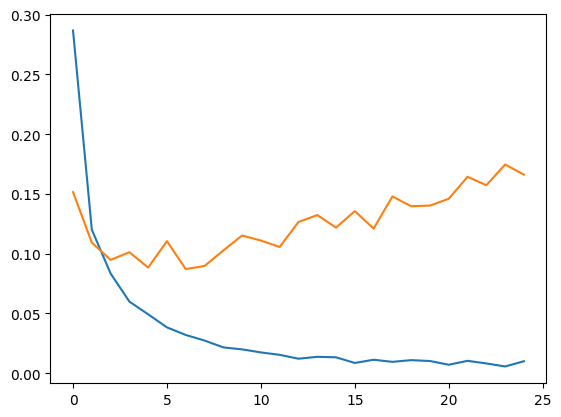

In [182]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

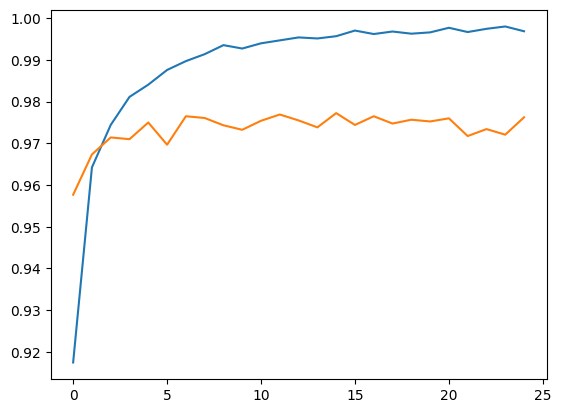

In [183]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

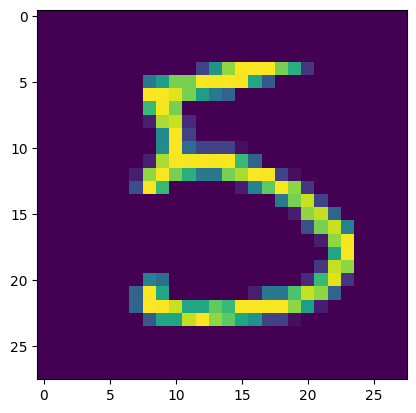

In [186]:
plt.imshow(x_test[15])

In [185]:
model.predict(x_test[15].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


array([5])